# Cats Vs Dogs - Classification

In this notebook I took 25000 pictures of cats and dogs trained my module on 80% of the data set after resizing the images and implying pca

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")
from PIL import Image
import numpy as np
import pandas as pd
import cv2

Resizing images to see what can be a good dimensionality

In [5]:
img = cv2.imread(r'C:\Users\USER\Desktop\train/cat.1.jpg')
resize_img = cv2.resize(img,(30,30))

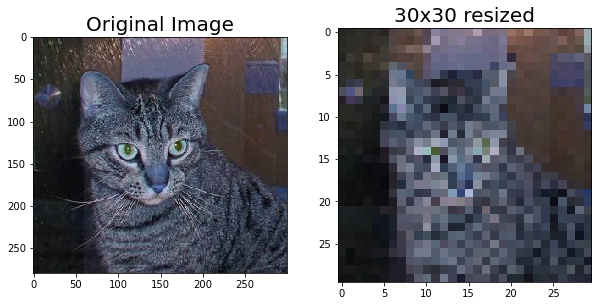

In [6]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1);
plt.imshow(img,cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
plt.title('Original Image', fontsize = 20);
plt.subplot(1, 2, 2);
plt.imshow(resize_img,cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255))
plt.title('30x30 resized', fontsize = 20);

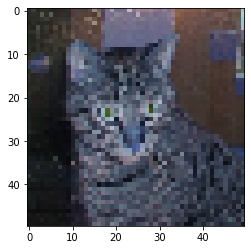

In [7]:
#lets try to get a better resolution
img = cv2.imread(r'C:\Users\USER\Desktop\train/cat.1.jpg')
resize_img = cv2.resize(img,(50,50))
plt.imshow(resize_img)

Uploading the data into work enviroment

In [8]:
def create(animal):
    tmp = cv2.imread(r'C:\Users\USER\Desktop\t'+animal+'.0.jpg')
    resize = cv2.resize(tmp,(60,60))
    resize = pd.Series(resize.flatten())
    resize = np.array(resize)
    arr = resize
    for i in range(1,12500):
        tmp = cv2.imread(r'C:\Users\USER\Desktop\t'+animal+'.'+str(i)+'.jpg')
        resize = cv2.resize(tmp,(60,60))
        resize = pd.Series(resize.flatten())
        resize = np.array(resize)
        arr = np.vstack((resize, arr))
    return pd.DataFrame(arr)

In [9]:
df = create('rain/cat')
df['label'] = 0
df2 = create('rain/dog')
df2['label'] = 1
train = pd.concat([df,df2])
train

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,label
0,28,35,52,24,31,48,28,34,53,25,...,95,117,135,99,122,140,96,113,132,0
1,153,145,132,138,130,117,124,116,103,117,...,215,216,212,215,214,210,194,193,189,0
2,179,173,175,172,172,172,169,169,169,173,...,175,199,224,161,186,212,181,211,242,0
3,221,223,221,222,223,221,222,223,221,222,...,47,42,41,39,33,34,33,29,29,0
4,122,120,120,125,123,123,129,126,126,129,...,159,152,141,161,153,140,153,142,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,138,149,157,137,148,156,138,149,157,142,...,45,50,59,33,32,36,39,38,40,1
12496,225,231,220,214,221,212,190,199,189,207,...,173,171,160,171,169,158,171,169,158,1
12497,144,174,199,155,161,161,190,165,142,196,...,198,204,209,204,210,215,210,215,221,1
12498,73,104,139,73,113,159,31,71,119,36,...,223,241,244,217,239,241,214,235,233,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("label",axis=1), train["label"], test_size=0.2,random_state=1)
X_train = X_train/255
X_test = X_test/255

In [11]:
from xgboost import XGBClassifier
xg = XGBClassifier( use_label_encoder=False)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("xgboost accuracy after resizing :" ,accuracy)

[16:07:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost accuracy after resizing : 0.6898


### PCA & Dimensionality reduction

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [46]:
print("number of components taken for the classification is", pca.n_components_,"from total of 7500 after resizing the images")

number of components taken for the classification is 1134 from total of 7500 after resizing the images


#### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)

0.6082

#### Xg boost

In [15]:
from xgboost import XGBClassifier
xg = XGBClassifier(use_label_encoder=False)
xg.fit(X_train, y_train)
xg_acc = accuracy_score(y_test, xg.predict(X_test))

[16:23:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Confusion matrix

In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix: ")
print(confusion)

confusion matrix: 
[[1559  958]
 [1001 1482]]


In [43]:
from sklearn import metrics

y_pred = xg.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("Accuracy: ",(TP + TN) / (TP + TN + FP + FN))
print("Classification Error: ",1-(TP + TN) / (TP + TN + FP + FN))
print("Recall (TPR): ", TP/(TP+FN))
print("Precision: ", TP/(TP+FP))
print("False positive rate: ", FP/(TN+FP))
F1 = (2)*TP/((2)*TP + FN + FP)
print("F1 = ",F1)

Accuracy:  0.6364
Classification Error:  0.36360000000000003
Recall (TPR):  0.6157873540072493
Precision:  0.6389469285415796
False positive rate:  0.3432657926102503
F1 =  0.6271534044298606


#### Voting classifier

In [36]:
rnd = RandomForestClassifier()
rnd.fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train,y_train)
#rnd_acc = accuracy_score(y_test,rnd.predict(X_test))
#knn_acc = accuracy_score(y_test,knn.predict(X_test))

KNeighborsClassifier(n_neighbors=50)

In [19]:
print("knn accuracy:" ,knn_acc)
print("random forest accuracy:" ,rnd_acc)
print("xgboost accuracy:" ,xg_acc)

knn accuracy: 0.6302
random forest accuracy: 0.5924
xgboost accuracy: 0.6364


In [20]:
vot = VotingClassifier(estimators = [('rnd',rnd),('knn', knn),('xgboost',xg)], voting='hard')
vot.fit(X_train,y_train)

[16:30:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rnd', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                      

In [21]:
vot_acc = accuracy_score(y_test, vot.predict(X_test))
print("voting accuracy:", vot_acc)

voting accuracy: 0.6504


In [48]:
acc = {'random forest': rnd_acc, 'knn':knn_acc, 'xgboost':xg_acc, 'voting':vot_acc}
data = {'module': ['random forest', 'knn', 'xgboost', 'voting'], 'Accuracy': [rnd_acc, knn_acc, xg_acc, vot_acc]}
df = pd.DataFrame(data)
print("Scores with 15.12% of the resized data:")
df

Scores with 15.12% of the resized data:


,module,Accuracy
0,random forest,0.5924
1,knn,0.6302
2,xgboost,0.6364
3,voting,0.6504
